<a href="https://colab.research.google.com/github/bhaskar-debug/mod_colab_poc/blob/main/bank-customer-churn-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: Bank Customer Churn Prediction

---

**Purpose**: Predict whether a bank's customers will churn (leave the bank) based on their banking behaviors and demographic data.

**Dataset**: Please find the dataset here - https://github.com/bhaskar-debug/mod_colab_poc/tree/main/content

**Load the dataset:**
Use descriptive statistics and visualization tools to explore data distributions, patterns, and relationships.

**Preprocess data:**
Convert categorical features to numeric using techniques like one-hot encoding.
Scale numerical features for algorithms sensitive to feature scaling

**Feature Engineering:**
Create new features that might provide additional value. For example:
Total transactions = credit score \* number of products.
Interaction terms based on domain knowledge.

**Model Building:**
Split the data into training, validation, and test sets.
Test multiple algorithms, including:
Logistic Regression
Decision Trees and Random Forest
Gradient Boosted Trees (like XGBoost)
Apply techniques to handle imbalanced classes if necessary, such as, Resampling methods (over-sampling or under-sampling)
Using different evaluation metrics (like F1-score or AUC-ROC)

**Model Evaluation and Selection:**
For each model, compute classification metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
Visualize results using confusion matrices, ROC curves, and precision-recall curves.
Based on evaluations, select the best performing model

**Hyperparameter Tuning:**
For the selected model, perform hyperparameter tuning using techniques like grid search or random search to further enhance the performance.


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Any
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
)

In [6]:
# Load Dataset
dirname = "content/"
filename = "Churn_Modelling.csv"
path = os.path.join(dirname, filename)

df: DataFrame = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print(df.shape)
df.info()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


## Exploration Data Analysis


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


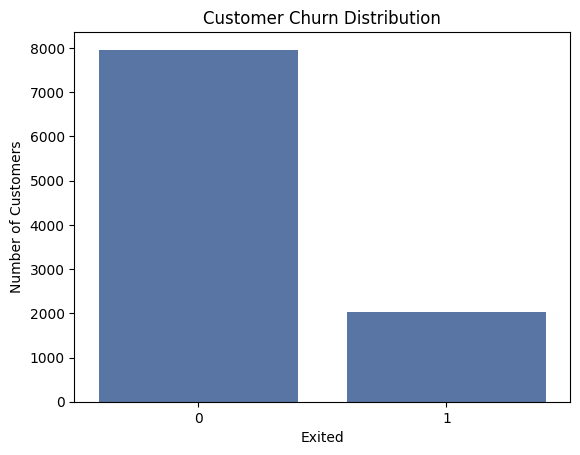

In [10]:
# Customers Exited Plot

print(df["Exited"].value_counts(normalize=True) * 100)

palette = "deep"
sns.set_palette(palette)

sns.countplot(data=df, x="Exited")

plt.xlabel("Exited")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")

plt.show()

In [11]:
# Distribution
df["Geography"].value_counts(normalize=True) * 100

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

In [12]:
# Distribution of Customer Churn in different Geographies
df.groupby("Geography")["Exited"].value_counts(normalize=True).mul(100)

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: proportion, dtype: float64

In [13]:
# Distribution
df["Gender"].value_counts(normalize=True) * 100

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

In [14]:
# Distribution of Customer Churn between genders
df.groupby("Gender")["Exited"].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: proportion, dtype: float64

In [15]:
print(df["Tenure"].value_counts(normalize=True).mul(100).sort_index())
print(df["HasCrCard"].value_counts().sort_index())

Tenure
0      4.13
1     10.35
2     10.48
3     10.09
4      9.89
5     10.12
6      9.67
7     10.28
8     10.25
9      9.84
10     4.90
Name: proportion, dtype: float64
HasCrCard
0    2945
1    7055
Name: count, dtype: int64


In [16]:
print(df["IsActiveMember"].value_counts().sort_index())
print("\n---------------------\n")
print(
    round(
        df.groupby("IsActiveMember")["Exited"].value_counts(
            normalize=True).mul(100), 2
    )
)

IsActiveMember
0    4849
1    5151
Name: count, dtype: int64

---------------------

IsActiveMember  Exited
0               0         73.15
                1         26.85
1               0         85.73
                1         14.27
Name: proportion, dtype: float64


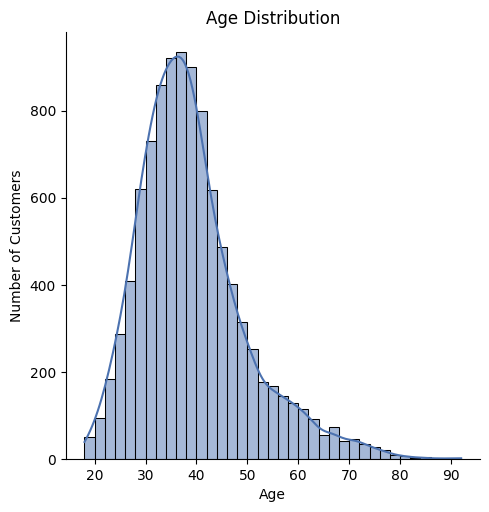

In [17]:
# Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x="Age", kde=True, bins=37)

plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution")

plt.show()

## Preprocess Dataset


In [18]:
print("Size of Dataset before dropping columns : ", df.shape)
drop_columns = ["RowNumber", "CustomerId", "Surname"]
df.drop(drop_columns, axis=1, inplace=True)
print("Size of Dataset after dropping columns : ", df.shape)

Size of Dataset before dropping columns :  (10000, 14)
Size of Dataset after dropping columns :  (10000, 11)


In [19]:
categorical_columns = ["Geography", "Gender"]

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop original categorical columns
df_encoded.drop(categorical_columns, axis=1, inplace=True)

In [20]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [21]:
# Transform continuous columns
from sklearn.preprocessing import MinMaxScaler

continuous_columns = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
]

scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(
    df_encoded[continuous_columns])

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False


### Checking correlation between features for final feature selection


<Axes: >

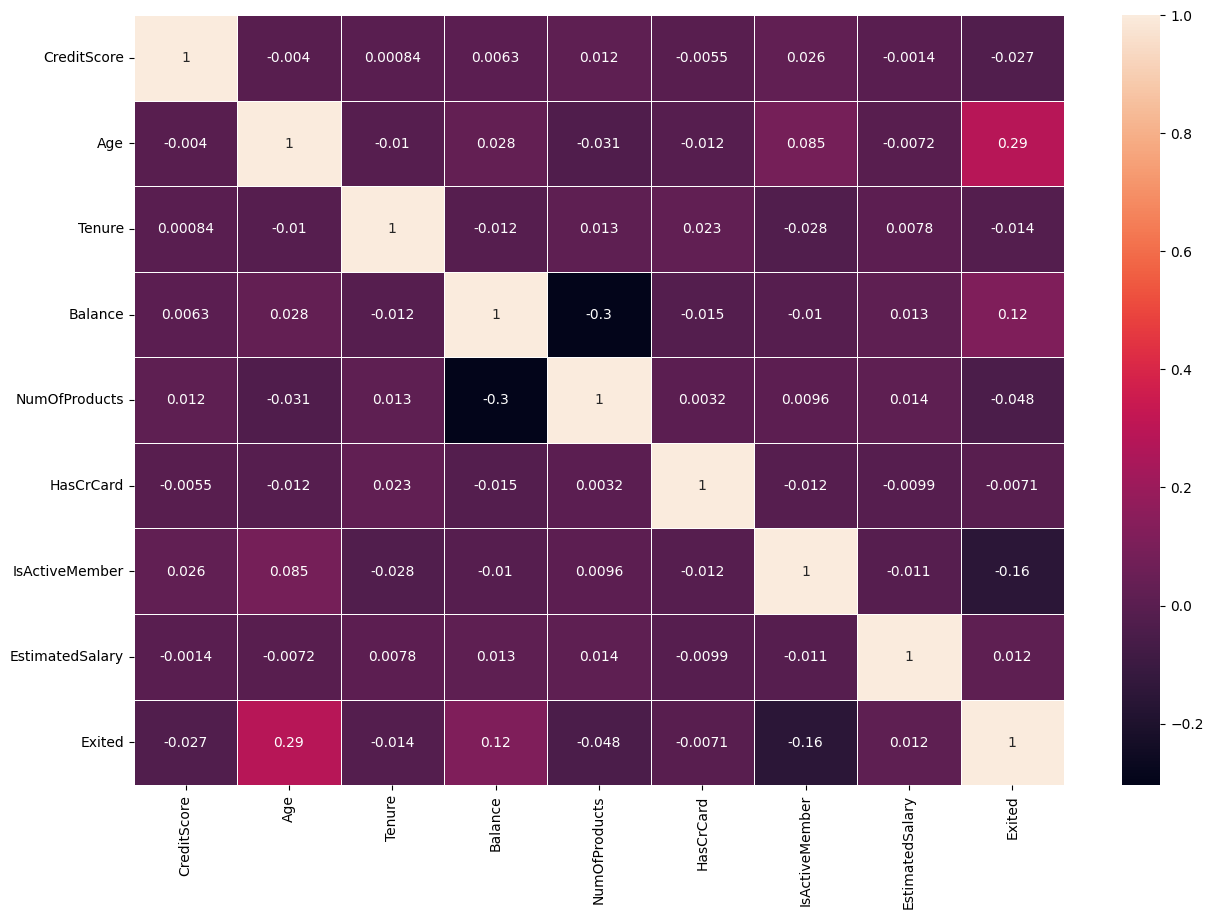

In [22]:
numeric_columns: DataFrame = df_encoded.select_dtypes(include=[np.number])
correlation_matrix: DataFrame = numeric_columns.corr()
# Creating a heatmap to find correlations among data
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

## Feature Selection


In [23]:
# Train Test Split
X: DataFrame = df_encoded.drop("Exited", axis=1)
y = df_encoded["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


## Model Building


In [24]:
# List of classifiers to test


classifiers: List[Tuple[str, Any]] = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Gaussion NB", GaussianNB()),
    ("XGB", xgb.XGBClassifier()),
]

In [25]:
# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(
        clf, X_train, y_train, cv=5, scoring="precision_macro"
    ).mean()
    avg_recall = cross_val_score(
        clf, X_train, y_train, cv=5, scoring="recall_macro"
    ).mean()

    # Print the performance metrics
    print(f"Classifier: {clf_name}")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print("-----------------------")

Classifier: Logistic Regression
Average Accuracy: 0.8139
Average Precision: 0.7269
Average Recall: 0.5928
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.7915
Average Precision: 0.6808
Average Recall: 0.6865
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8615
Average Precision: 0.8260
Average Recall: 0.7082
-----------------------
Classifier: KNN
Average Accuracy: 0.8120
Average Precision: 0.7086
Average Recall: 0.6158
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8189
Average Precision: 0.7218
Average Recall: 0.6550
-----------------------
Classifier: XGB
Average Accuracy: 0.8492
Average Precision: 0.7795
Average Recall: 0.7157
-----------------------


## Model Evaluation and Selection


In [26]:
# Method to evaluate the performance of the model
from sklearn.metrics import roc_curve, auc


def evaluate_model(y_test, y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    # plt.figure(figsize=(3,3))
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap="Greens", fmt=".0f")

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

    plt.show()


# Method to plot AUC-ROC


def plot_roc_(false_positive_rate, true_positive_rate, roc_auc):
    plt.figure(figsize=(3, 3))
    plt.title("Receiver Operating Characteristic")
    plt.plot(
        false_positive_rate,
        true_positive_rate,
        color="red",
        label="AUC = %0.2f" % roc_auc,
    )
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.axis("tight")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


---------------------------------------------



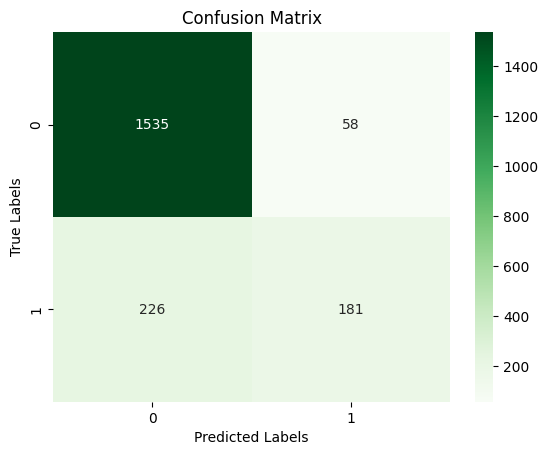

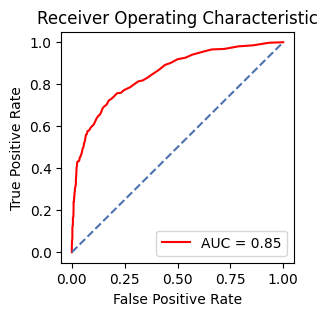

In [32]:
import pickle

# Creating the Random Forest classifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
RFC.fit(X_train, y_train)

# Making predictions on the test set
y_pred = RFC.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

with open("model/saved_model.pkl", "wb") as file:
    pickle.dump(RFC, file)

# Plotting AUC-ROC
y_proba = RFC.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate, true_positive_rate, roc_auc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000


---------------------------------------------



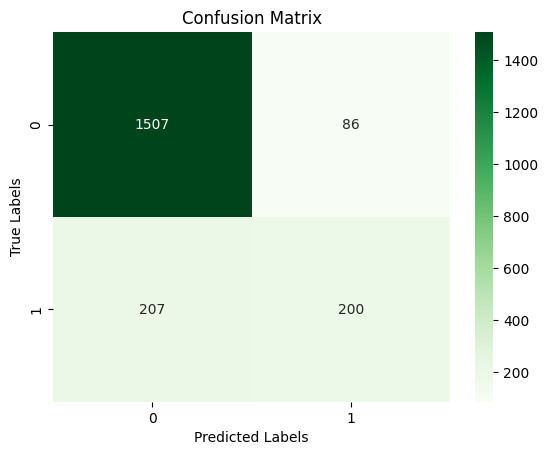

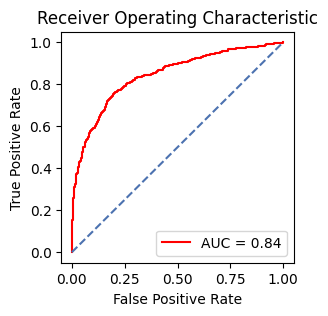

In [ ]:
# Creating the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Training the classifier
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

# Plotting AUC-ROC
y_proba = xgb_classifier.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, y_proba[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate, true_positive_rate, roc_auc)

# Advanced


## Feature Engineering


(-1.0, 5.0)

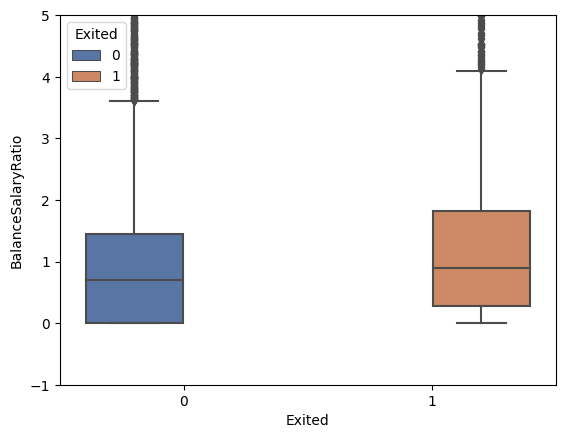

In [ ]:
# 1st Attribute - Balance Salary Ratio
df["BalanceSalaryRatio"] = df.Balance / df.EstimatedSalary
sns.boxplot(y="BalanceSalaryRatio", x="Exited", hue="Exited", data=df)
plt.ylim(-1, 5)

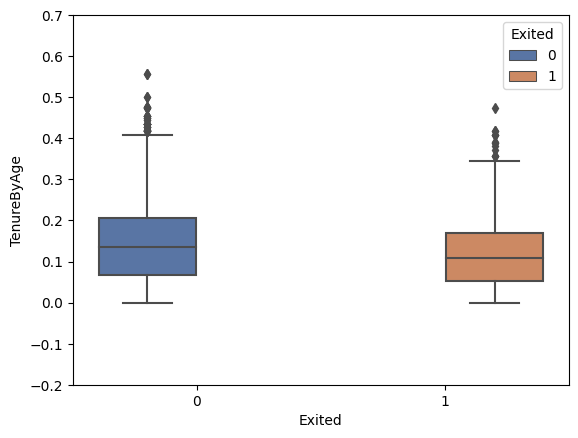

In [ ]:
#  2nd Attribute-Tenure By Age
df["TenureByAge"] = df.Tenure / (df.Age)
sns.boxplot(y="TenureByAge", x="Exited", hue="Exited", data=df)
plt.ylim(-0.2, 0.7)
plt.show()

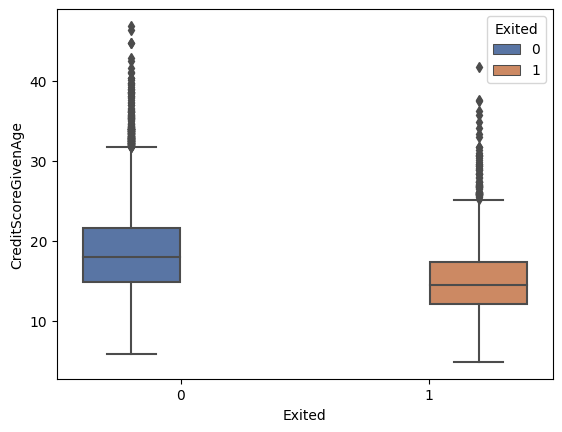

In [ ]:
# 3rd Attribute- Credit Score Given Age
df["CreditScoreGivenAge"] = df.CreditScore / (df.Age)
sns.boxplot(y="CreditScoreGivenAge", x="Exited", hue="Exited", data=df)
plt.show()

In [ ]:
print(df.shape)
df.head()

(10000, 14)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [ ]:
categorical_columns: list[str] = ["Geography", "Gender"]

# Perform one-hot encoding
one_hot_encoded: DataFrame = pd.get_dummies(df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded: DataFrame = pd.concat([df, one_hot_encoded], axis=1)

# Drop original categorical columns
df_encoded.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0,0,1,1,0


In [ ]:
# Transform continuous columns
from sklearn.preprocessing import MinMaxScaler

continuous_columns: list[str] = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
    "BalanceSalaryRatio",
    "TenureByAge",
    "CreditScoreGivenAge",
]

scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(
    df_encoded[continuous_columns])

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,0.235083,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.000070,0.043902,0.237252,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0.000132,0.342857,0.168807,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.046154,0.310859,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0.354739,0,0,1,1,0


<Axes: >

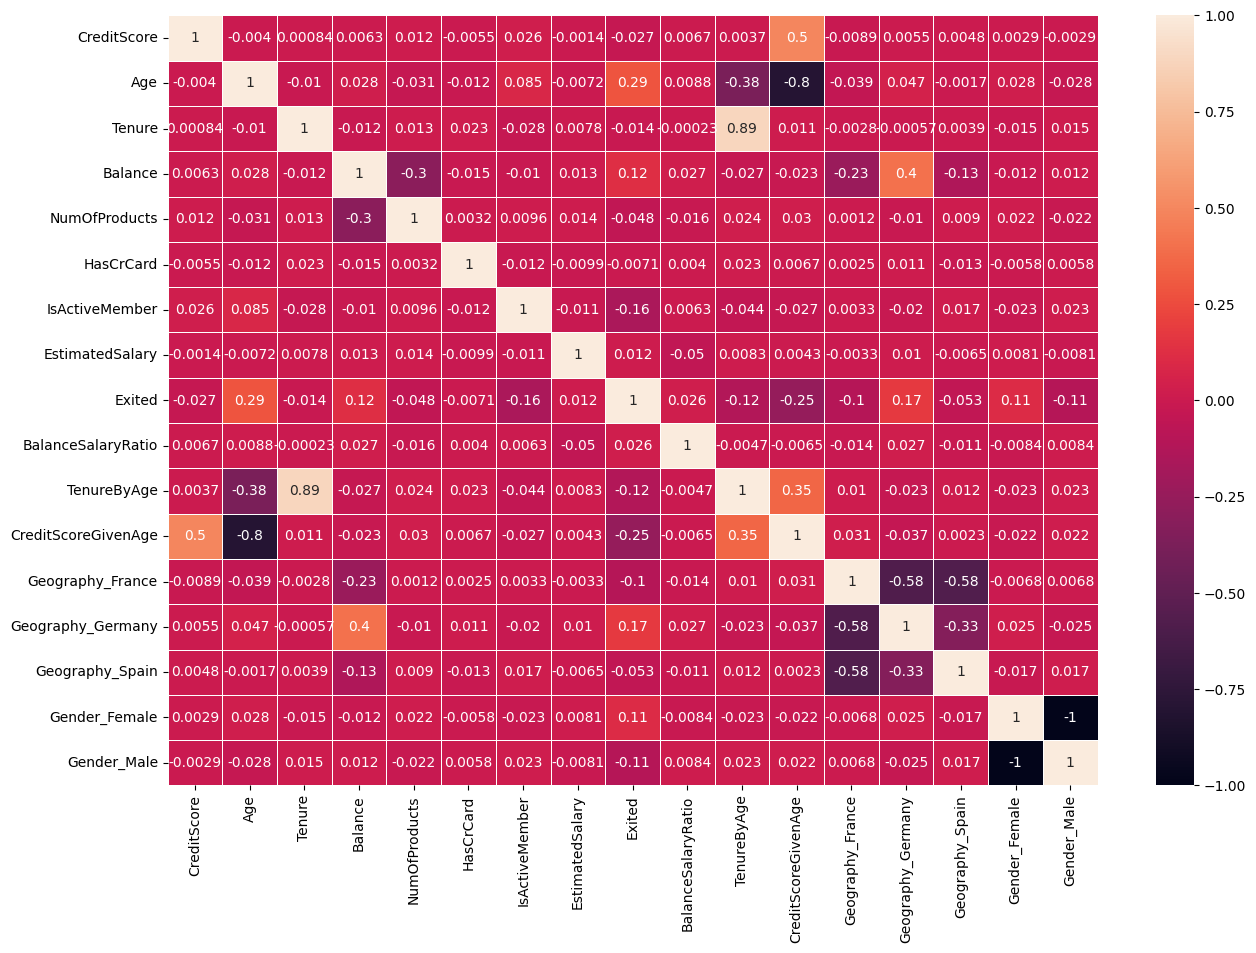

In [ ]:
numeric_columns: DataFrame = df_encoded.select_dtypes(include=[np.number])
correlation_matrix: DataFrame = numeric_columns.corr()
# Creating a heatmap to find correlations among data
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

In [ ]:
# Drop unnecessary columns
columns_to_drop: List[str] = ["Age"]
print(f"Dropping unnecessary features: {columns_to_drop}")
cleaned_data: DataFrame = df_encoded.drop(
    columns_to_drop,
    axis=1,
)

Dropping unnecessary features: ['Age']


In [ ]:
# Train Test Split
X: DataFrame = cleaned_data.drop("Exited", axis=1)
y = cleaned_data["Exited"]

print(X.shape)
print(y.shape)

(10000, 15)
(10000,)


## Oversampling


In [ ]:
# Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 15)
(3186, 15)
(12740,)
(3186,)


In [ ]:
# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(
        clf, X_train, y_train, cv=5, scoring="precision_macro"
    ).mean()
    avg_recall = cross_val_score(
        clf, X_train, y_train, cv=5, scoring="recall_macro"
    ).mean()

    # Print the performance metrics
    print(f"Classifier: {clf_name}")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print("-----------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier: Logistic Regression
Average Accuracy: 0.7095
Average Precision: 0.7098
Average Recall: 0.7095
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.8035
Average Precision: 0.8057
Average Recall: 0.8030
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8848
Average Precision: 0.8837
Average Recall: 0.8870
-----------------------
Classifier: KNN
Average Accuracy: 0.8097
Average Precision: 0.8222
Average Recall: 0.8097
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.5948
Average Precision: 0.7011
Average Recall: 0.5948
-----------------------
Classifier: XGB
Average Accuracy: 0.8856
Average Precision: 0.8860
Average Recall: 0.8856
-----------------------


## Best Model


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1593
           1       0.88      0.92      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186


---------------------------------------------



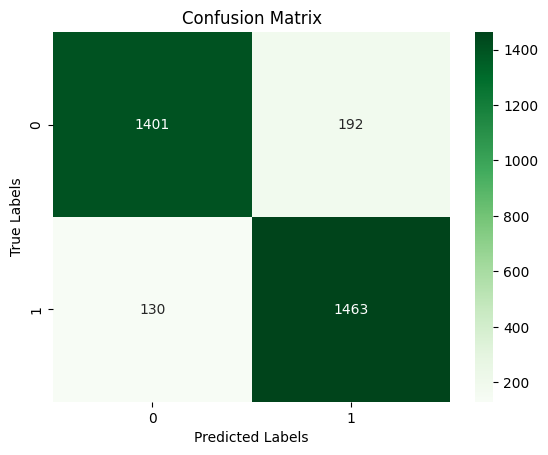

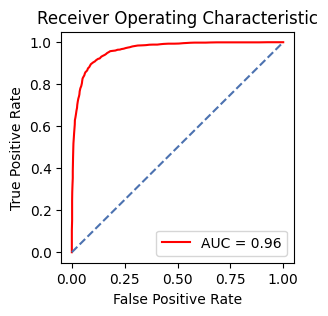

In [ ]:
# Creating the Random Forest classifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
RFC.fit(X_train, y_train)

# Making predictions on the test set
y_pred = RFC.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

# Plotting AUC-ROC
y_proba = RFC.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate, true_positive_rate, roc_auc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1593
           1       0.90      0.88      0.89      1593

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186


---------------------------------------------



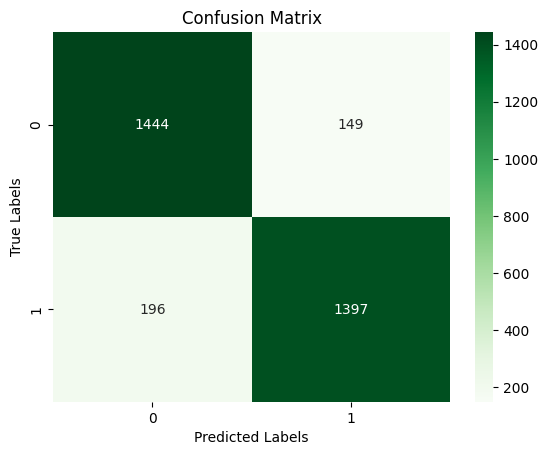

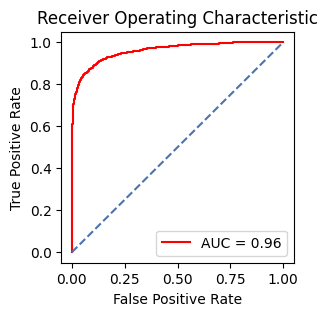

In [ ]:
# Create an XGBClassifier model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Compute Accuracy
evaluate_model(y_test, y_pred)

# Plotting AUC-ROC
y_proba = xgb_model.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, y_proba[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate, true_positive_rate, roc_auc)

## Hyperparameter Tuning


In [ ]:
# Perform GridSearch
from sklearn.model_selection import GridSearchCV

### Random Forest Tuning


In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    # Add other parameters to tune
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf_model, param_grid=param_grid, scoring="accuracy", cv=3
)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print Best Parameter
print("Best Parameters: ", best_params)

# Print Best Cross Validation Score
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

accuracy = best_rf_model.score(X_train, y_train)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_train, y_train_pred))

print("")

print("Testing")
# Evaluate best model testing
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_test, y_test_pred))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score:  0.8769227919716348
Accuracy on Test Data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740


Testing
Accuracy on Test Data:  0.9017576898932831
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1593
           1       0.89      0.92      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



### XGBoost Tuning


In [ ]:
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 200, 300],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Print Best Parameter
print("Best Parameters: ", grid_search.best_params_)

# Print Best Cross Validation Score
print("Best Cross-Validation Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Training")
# Evaluate best model testing
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_train, y_train)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_train, y_train_pred))

print("")

print("Testing")
# Evaluate best model testing
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_test, y_test_pred))

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Cross-Validation Score:  0.881868131868132
Training
Accuracy on Test Data:  0.9384615384615385
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6370
           1       0.96      0.92      0.94      6370

    accuracy                           0.94     12740
   macro avg       0.94      0.94      0.94     12740
weighted avg       0.94      0.94      0.94     12740


Testing
Accuracy on Test Data:  0.8907721280602636
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1593
           1       0.91      0.87      0.89      1593

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

